In [1]:
import scanpy as sc
import scvelo as scv

In [2]:
adata = sc.read('../../../../../../../media/spencer/Extra HDD/lung_data/combined_epi_stromal.h5ad')

In [6]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.rename_categories({
                                                                      'Early AT2-like cells': 'Tip cells'})

In [3]:
adata.obs['time_groups'] = 0
time_groups = []
for i in range(adata.shape[0]):
    if adata[i].obs.GW.astype(float).item() < 14:
        time_groups.append('GW 10-13')
    elif adata[i].obs.GW.astype(float).item() < 17:
        time_groups.append('GW 14-16')
    else:
        time_groups.append('GW 17-19')
adata.obs['time_groups'] = time_groups

In [9]:
plotdf = sc.get.obs_df(
adata,
keys=['WNT2', 'WNT2B','FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6',
      'JAG1', 'JAG2','NOTCH2', 'NOTCH3',
      'FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18','FGFR2', 'FGFR1', 'FGFR3',
     'cell_type', 'time_groups'],
)
plotdf.round(decimals=3).to_csv('data/LR_signalling_expression.csv')

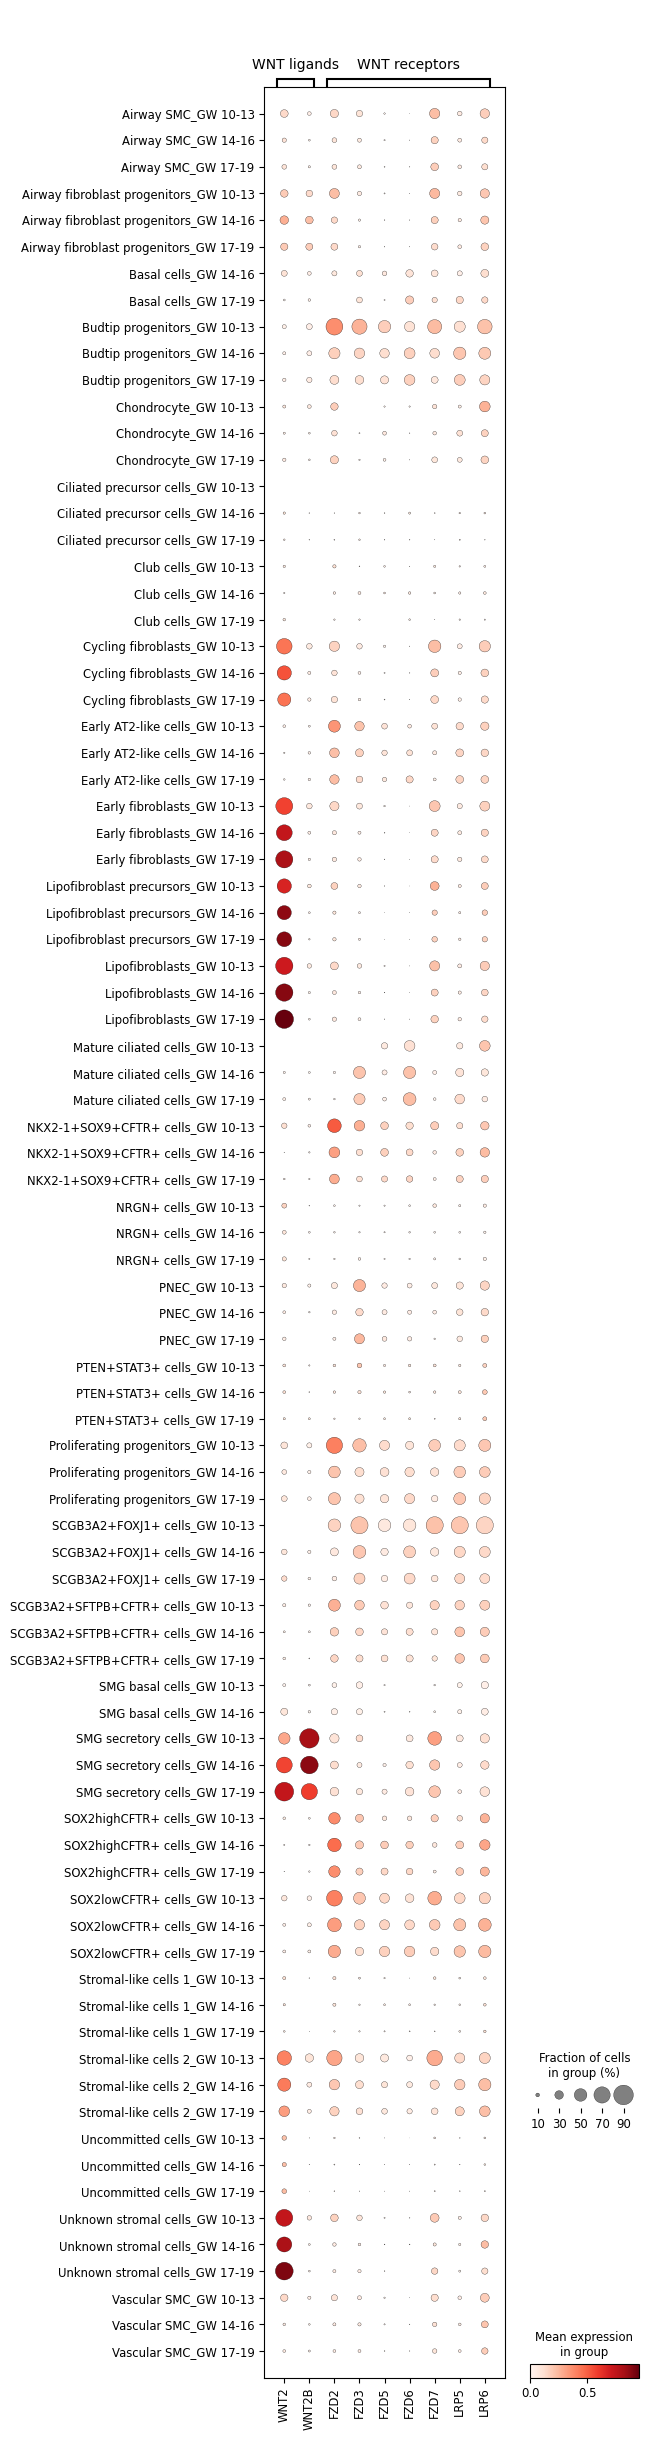

In [5]:
sc.pl.dotplot(adata, 
              var_names=['WNT2', 'WNT2B',
                         'FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6'],
              groupby=['cell_type', 'time_groups'],
             var_group_positions=[(0,1), (2,8)], 
              var_group_labels=['WNT ligands', 'WNT receptors'],var_group_rotation=0,
             save='WNT_pathway_expression_all.pdf')

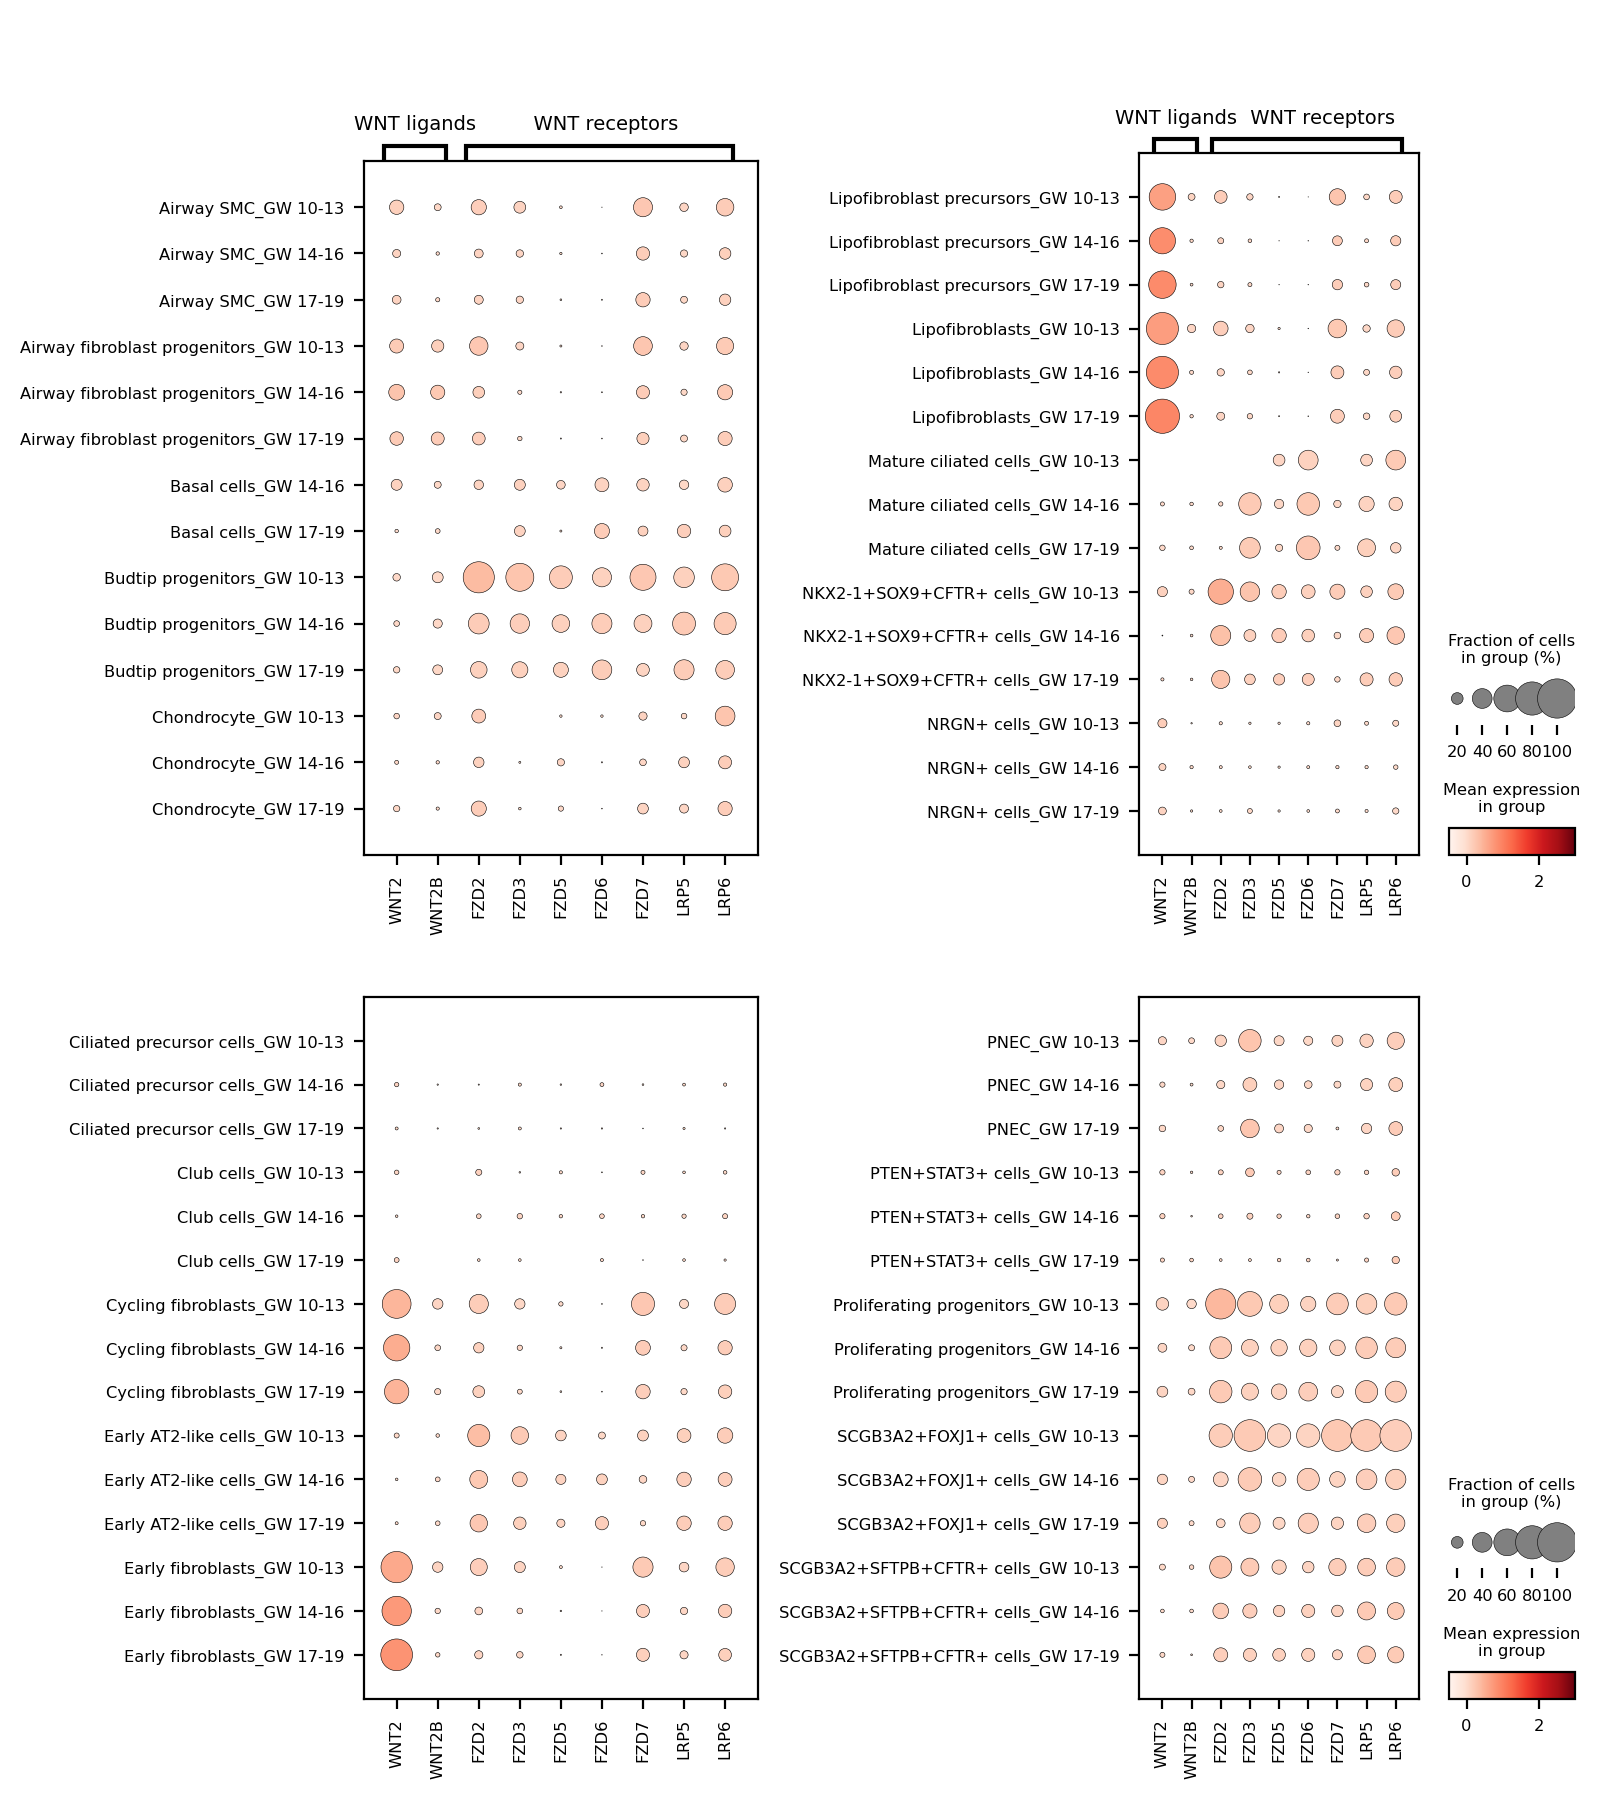

In [6]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,2, figsize=(8,9))

import gc 
gc.collect()

sc.set_figure_params(scanpy=True, fontsize=7)

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[:5])], var_names=['WNT2', 'WNT2B',
                         'FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,0],return_fig=True, 
             var_group_positions=[(0,1), (2,8)], 
              var_group_labels=['WNT ligands', '  WNT receptors'],var_group_rotation=0,
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[5:10])], var_names=['WNT2', 'WNT2B',
                         'FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,0],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[10:15])], var_names=['WNT2', 'WNT2B',
                         'FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,1],return_fig=True, 
             var_group_positions=[(0,1), (2,8)], 
              var_group_labels=['WNT ligands', '     WNT receptors'],var_group_rotation=0,
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[15:20])], var_names=['WNT2', 'WNT2B',
                         'FZD2', 'FZD3', 'FZD5', 'FZD6', 'FZD7', 'LRP5', 'LRP6'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,1],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()

ax[0,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
#ax[1,1].xaxis.xticklabels.set_fontsize(12)
#for label in ax.get_xticklabels():
#    label.set_fontsize('large')

#ax[1,1].tick_params(axis="x", labelrotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.01, wspace=0.78)
plt.savefig('WNT_pathway_expression_all_columns.pdf')
plt.show()

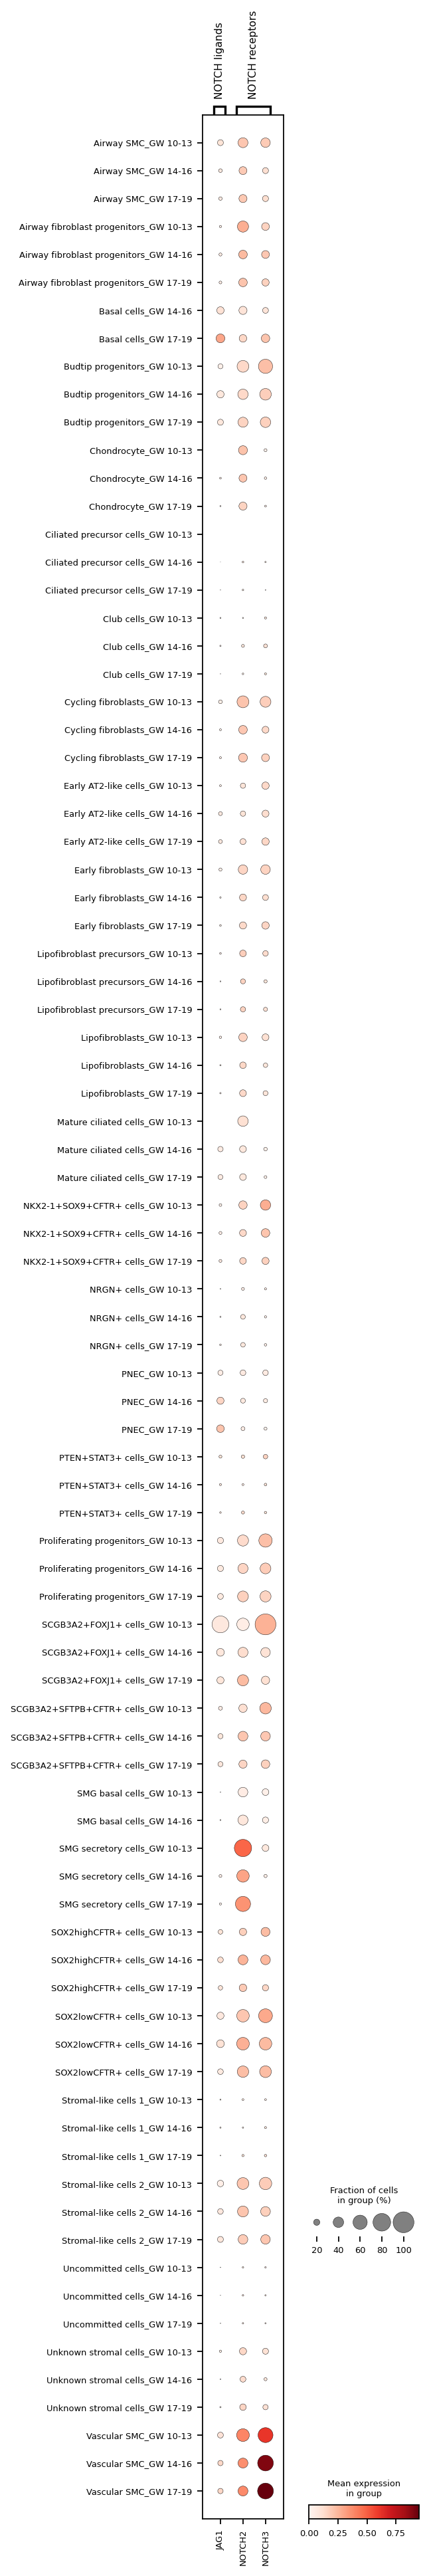

In [7]:
sc.pl.dotplot(adata,
              var_names=['JAG1', 'NOTCH2', 'NOTCH3'],
              groupby=['cell_type', 'time_groups'],
             var_group_positions=[(0,0), (1,2)], var_group_rotation=90,
              var_group_labels=['NOTCH ligands', 'NOTCH receptors'],
             save='NOTCH_pathway_expression_all.pdf')

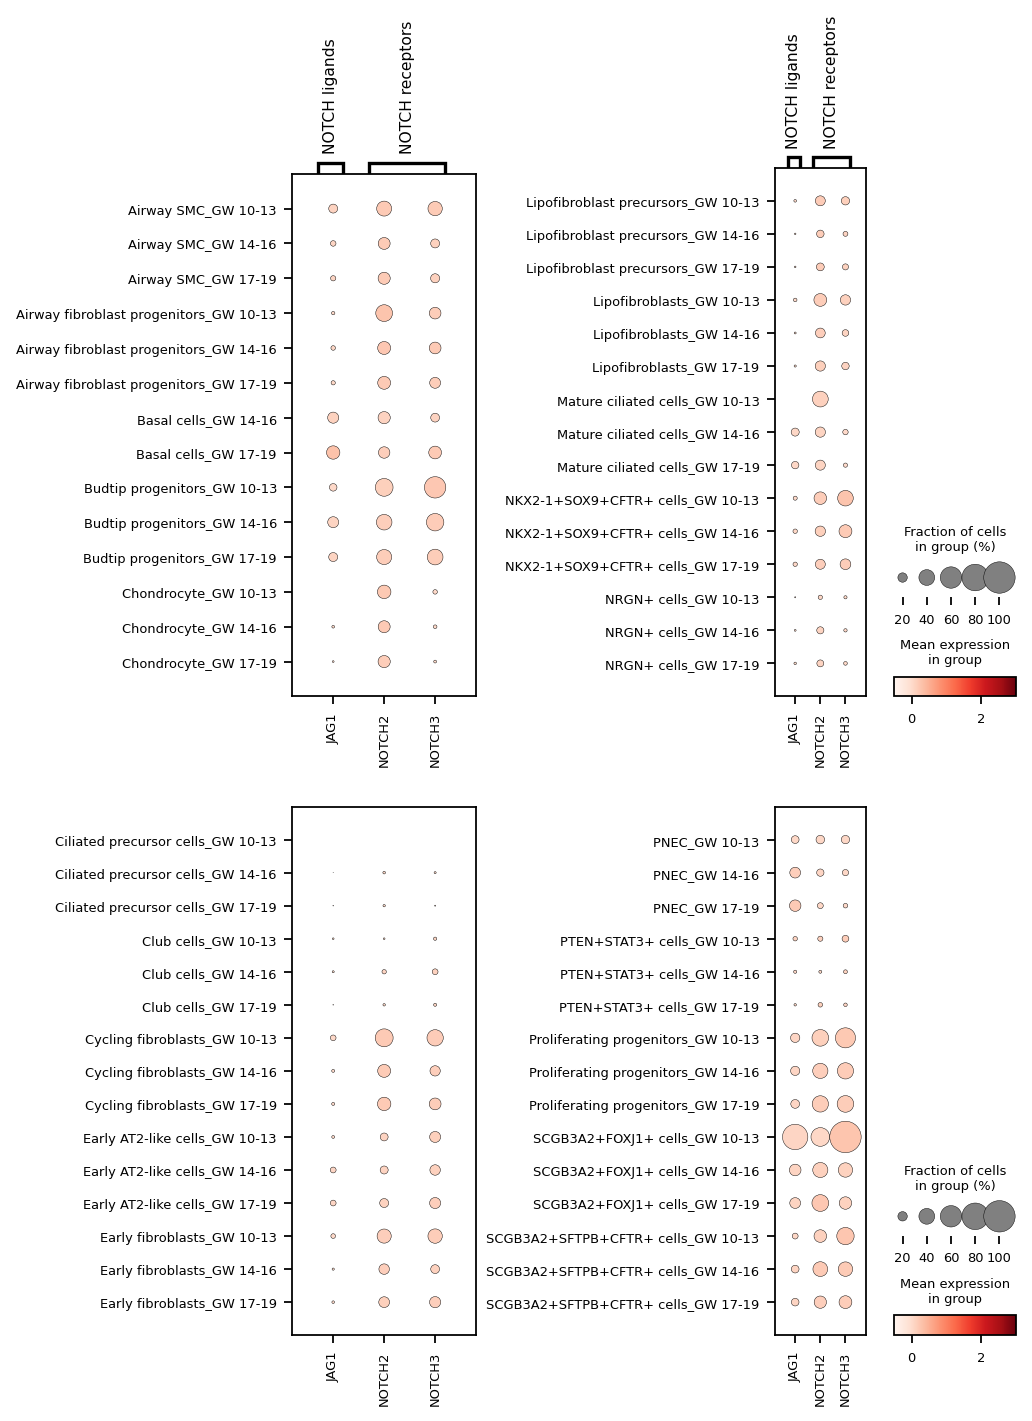

In [8]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,2, figsize=(6.5,9))

import gc 
gc.collect()

sc.set_figure_params(scanpy=True, fontsize=7)

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[:5])], var_names=['JAG1', 'NOTCH2', 'NOTCH3'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,0],return_fig=True, 
                           var_group_positions=[(0,0), (1,2)], var_group_rotation=90,
              var_group_labels=['NOTCH ligands', 'NOTCH receptors'],
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[5:10])], var_names=['JAG1', 'NOTCH2', 'NOTCH3'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,0],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[10:15])], var_names=['JAG1', 'NOTCH2', 'NOTCH3'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,1],return_fig=True, 
                           var_group_positions=[(0,0), (1,2)], var_group_rotation=90,
              var_group_labels=['NOTCH ligands', 'NOTCH receptors'],
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[15:20])], var_names=['JAG1', 'NOTCH2', 'NOTCH3'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,1],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()

ax[0,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
#ax[1,1].xaxis.xticklabels.set_fontsize(12)
#for label in ax.get_xticklabels():
#    label.set_fontsize('large')

#ax[1,1].tick_params(axis="x", labelrotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.015, wspace=1)
plt.savefig('NOTCH_pathway_expression_all_columns.pdf')
plt.show()

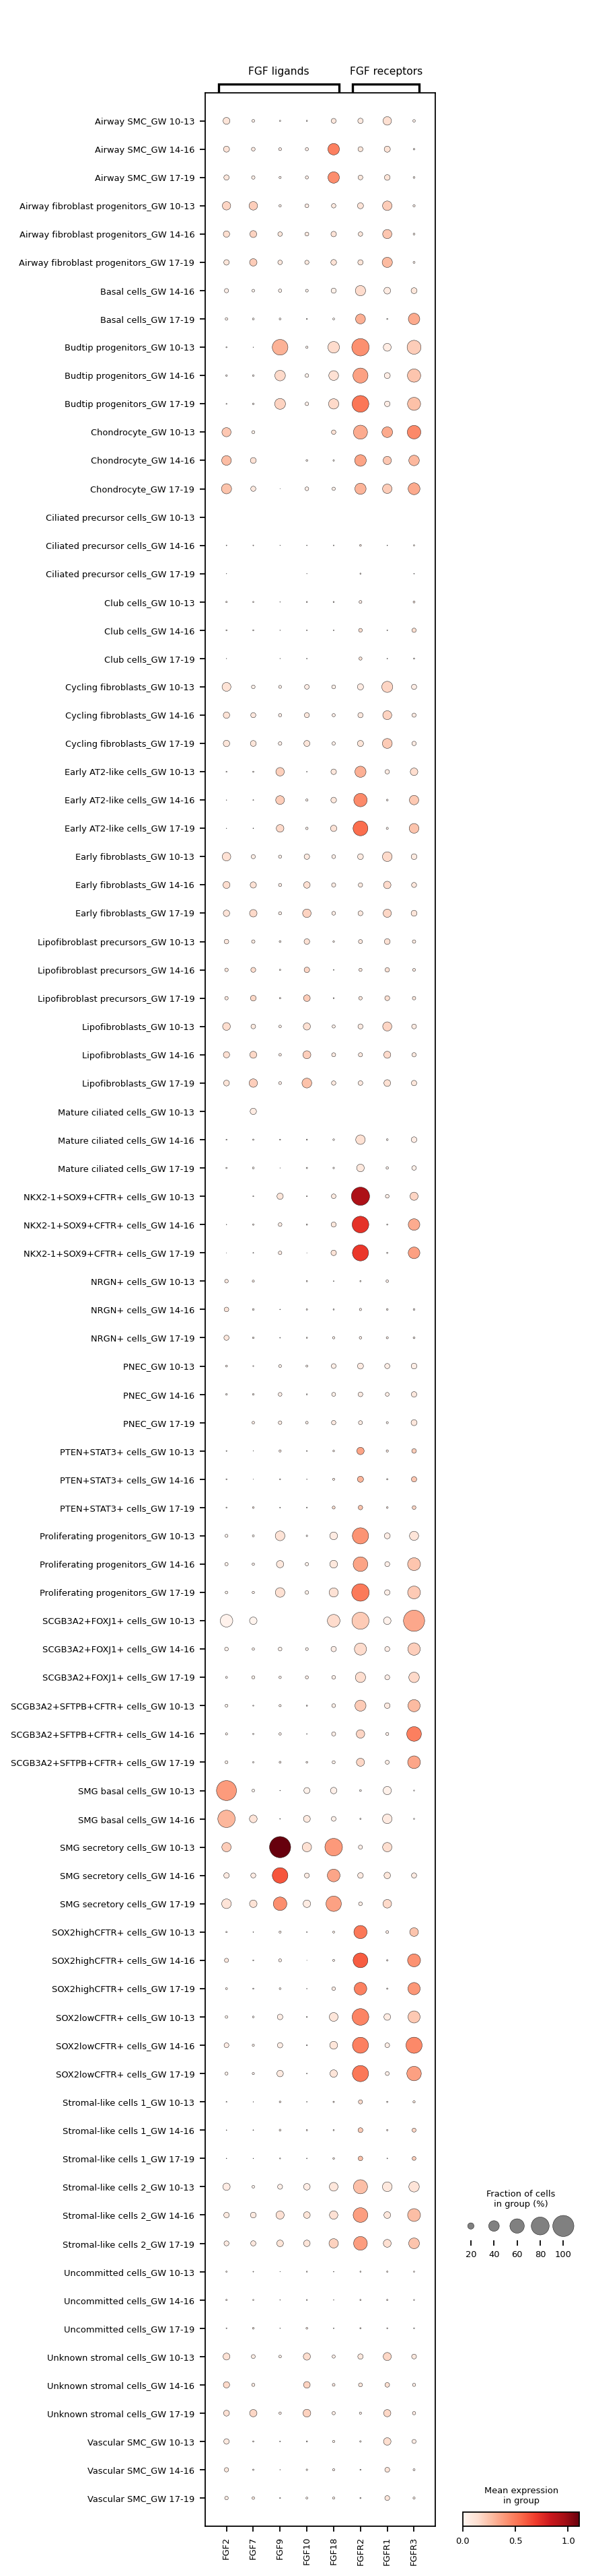

In [9]:
sc.pl.dotplot(adata,
              var_names=['FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18',
                         'FGFR2', 'FGFR1', 'FGFR3'],
              groupby=['cell_type', 'time_groups'],
             var_group_positions=[(0,4), (5,7)], var_group_rotation=0,
              var_group_labels=['FGF ligands', 'FGF receptors'],
              save='FGF_pathway_expression_all.pdf'
             )

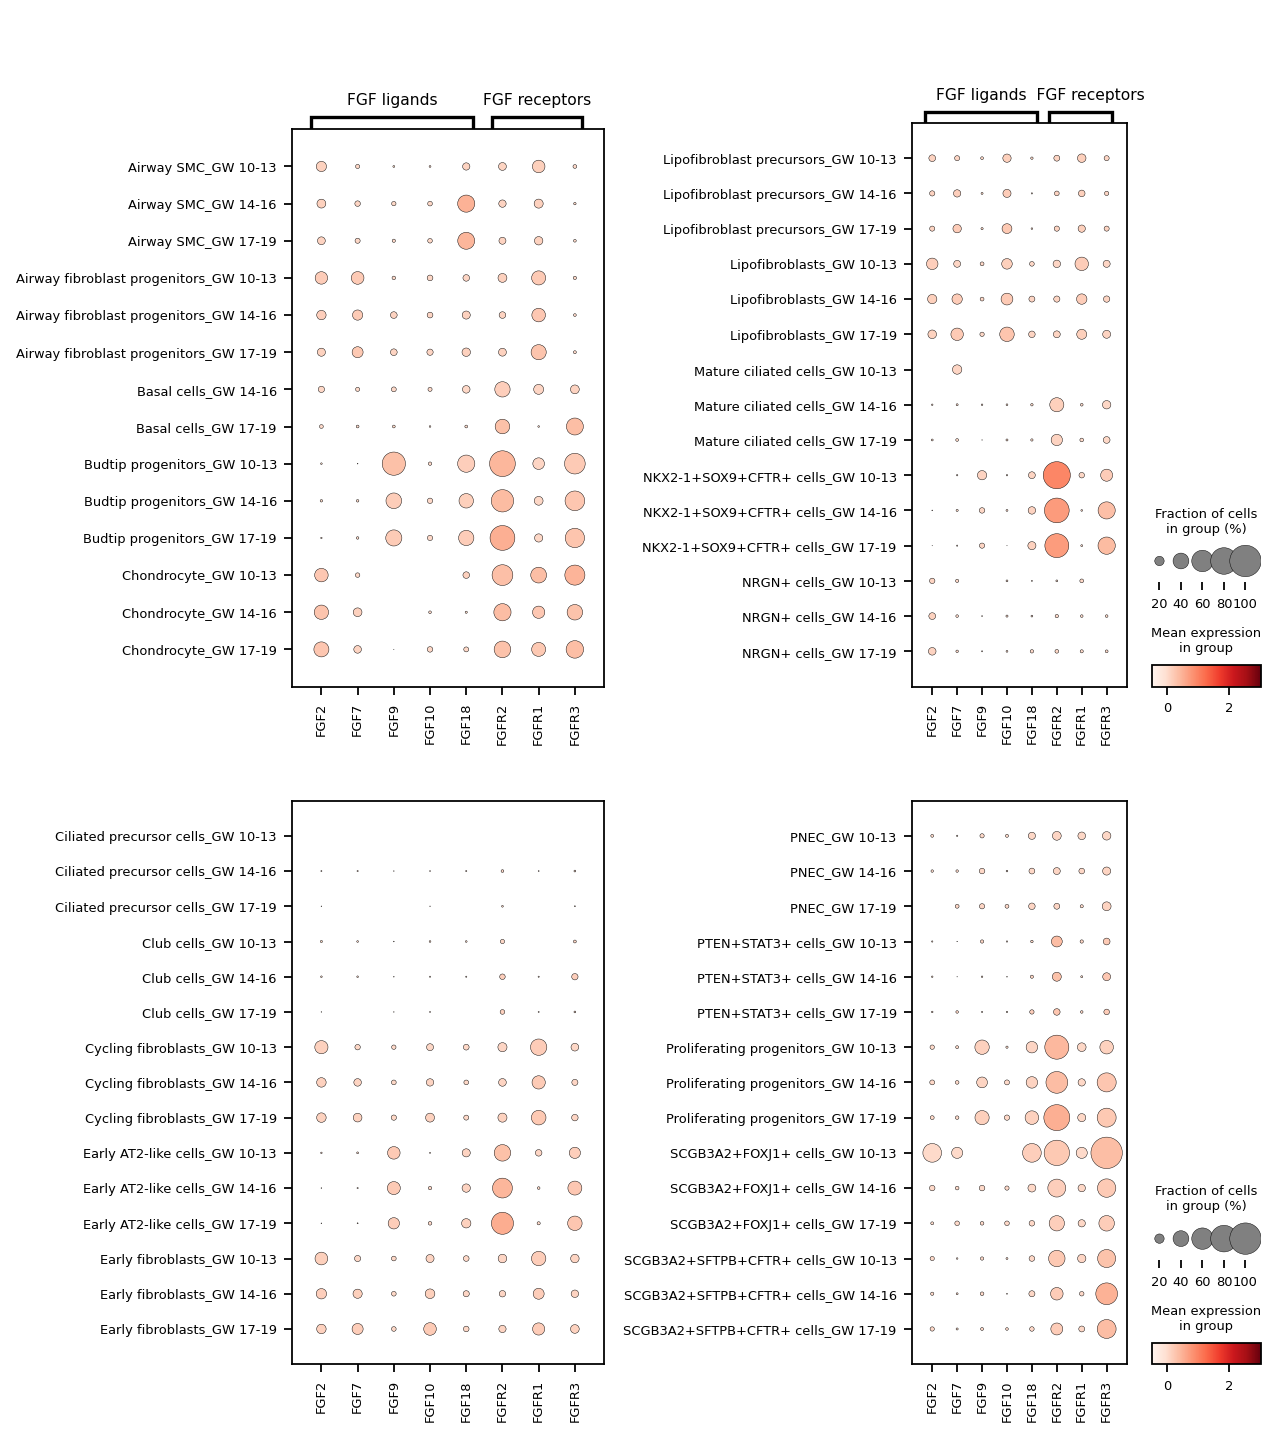

In [10]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,2, figsize=(8,9))

import gc 
gc.collect()

sc.set_figure_params(scanpy=True, fontsize=7)

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[:5])], var_names=['FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18',
                         'FGFR2', 'FGFR1', 'FGFR3'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,0],return_fig=True, 
             var_group_positions=[(0,4), (5,7)], var_group_rotation=0,
              var_group_labels=['FGF ligands', 'FGF receptors'],
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[5:10])], var_names=['FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18',
                         'FGFR2', 'FGFR1', 'FGFR3'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,0],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).legend(show=False).make_figure()

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[10:15])], var_names=['FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18',
                         'FGFR2', 'FGFR1', 'FGFR3'],
             groupby=['cell_type', 'time_groups'],ax=ax[0,1],return_fig=True, 
             var_group_positions=[(0,4), (5,7)], var_group_rotation=0,
              var_group_labels=['FGF ligands', '    FGF receptors'],
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()#figsize=(3,7))

sc.pl.dotplot(adata[adata.obs.cell_type.isin(adata.obs.cell_type.cat.categories[15:20])], var_names=['FGF2', 'FGF7', 'FGF9', 'FGF10', 'FGF18',
                         'FGFR2', 'FGFR1', 'FGFR3'],
             groupby=['cell_type', 'time_groups'],ax=ax[1,1],return_fig=True, 
              dot_max=1, dot_min=0, vmin=-0.5, vmax=3).make_figure()

ax[0,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
#ax[1,1].xaxis.xticklabels.set_fontsize(12)
#for label in ax.get_xticklabels():
#    label.set_fontsize('large')

#ax[1,1].tick_params(axis="x", labelrotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.01, wspace=0.78)
plt.savefig('FGF_pathway_expression_all_columns.pdf')
plt.show()